In [1]:
%matplotlib qt

In [5]:
from mne import find_events, read_events, set_log_level, Epochs
from mne.io import read_raw_fif
from mne.preprocessing import ICA

import numpy as np
import pandas as pd

from enobio import read_raw_enobio

set_log_level(verbose='error')
pd.options.display.max_rows = 500

In [23]:
# Read in the data.
raw_rteeg = read_raw_fif('tests/rteeg_test_Dec8-raw.fif', 
                        add_eeg_ref=False, preload=True)
raw_coregui = read_raw_enobio('tests/rteeg_test_Dec8-coregui.easy',
                              montage='Enobio32')

# Add events to the raw data.
events_rteeg = read_events('tests/rteeg_test_Dec8-events.fif')
# raw_rteeg.add_events(events_rteeg)

events_coregui = find_events(raw_coregui)

raw_rteeg.filter(1., 40.)
raw_coregui.filter(1., 40.)

<RawEnobio  |  rteeg_test_Dec8-coregui.easy, n_channels x n_times : 33 x 338750 (677.5 sec), ~85.4 MB, data loaded>

In [32]:
# Pair-wise correlation between column of Coregui and rteeg recordings.
print raw_coregui.to_data_frame().corrwith(raw_rteeg.to_data_frame())

signal
P7         0.999904
P4         0.999934
Cz         0.999796
Pz         0.999804
P3         0.999840
P8         0.999850
O1         0.999966
O2         0.999893
T8         0.999498
F8         0.999967
C4         0.999600
F4         0.999898
Fp2        0.999926
Fz         0.999802
C3         0.999744
F3         0.999845
Fp1        0.999779
T7         0.999872
F7         0.999997
Oz         0.999970
PO4        0.999984
FC6        0.999827
FC2        0.999736
AF4        0.999926
CP6        0.999616
CP2        0.999579
CP1        0.999805
CP5        0.999778
FC1        0.999844
FC5        0.999899
AF3        0.999830
PO3        0.999965
STI 014         NaN
dtype: float64


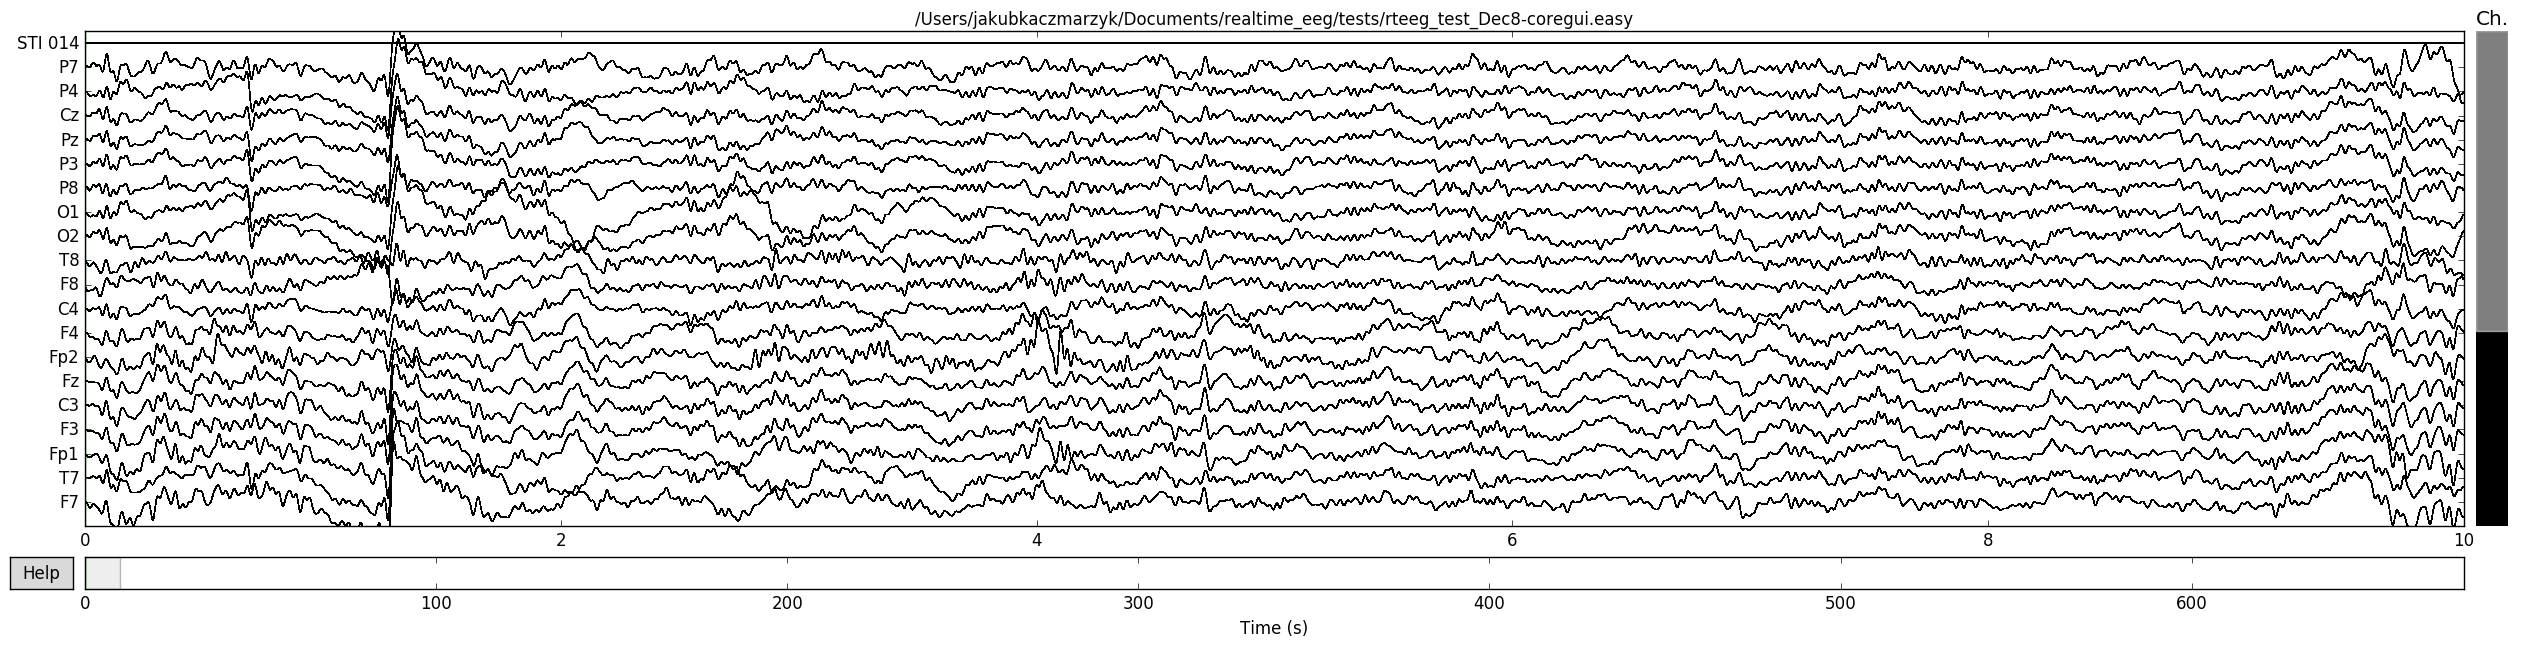

In [4]:
raw_rteeg.plot(events=events_rteeg)
raw_coregui.plot(events=events_coregui)

In [6]:
epochs_coregui = Epochs(raw_coregui, events_coregui, tmin=-0.5, tmax=5.0, baseline=None, add_eeg_ref=False)
epochs_rteeg = Epochs(raw_rteeg, events_rteeg, tmin=-0.5, tmax=5.0, baseline=None, add_eeg_ref=False)

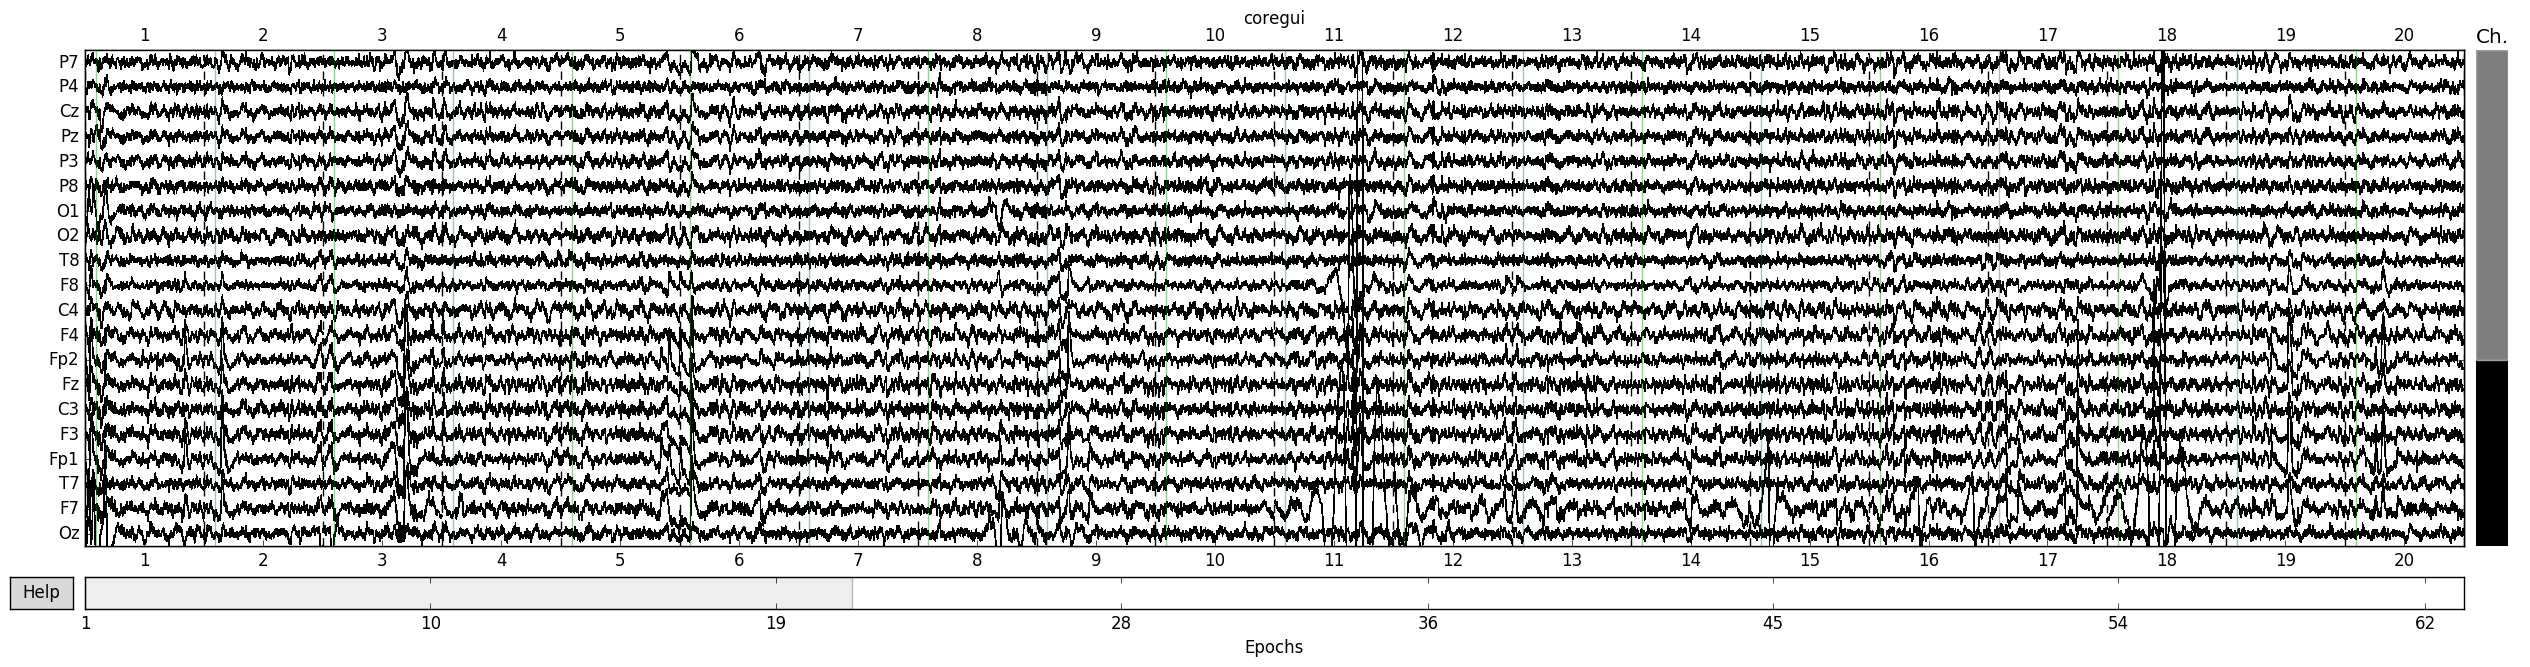

In [8]:
epochs_rteeg.plot(scalings='auto', title='rteeg')
epochs_coregui.plot(scalings='auto', title='coregui')

In [24]:
rteeg_ica = ICA().fit(raw_rteeg)
print("fitted")
coregui_ica = ICA().fit(raw_coregui)

fitted


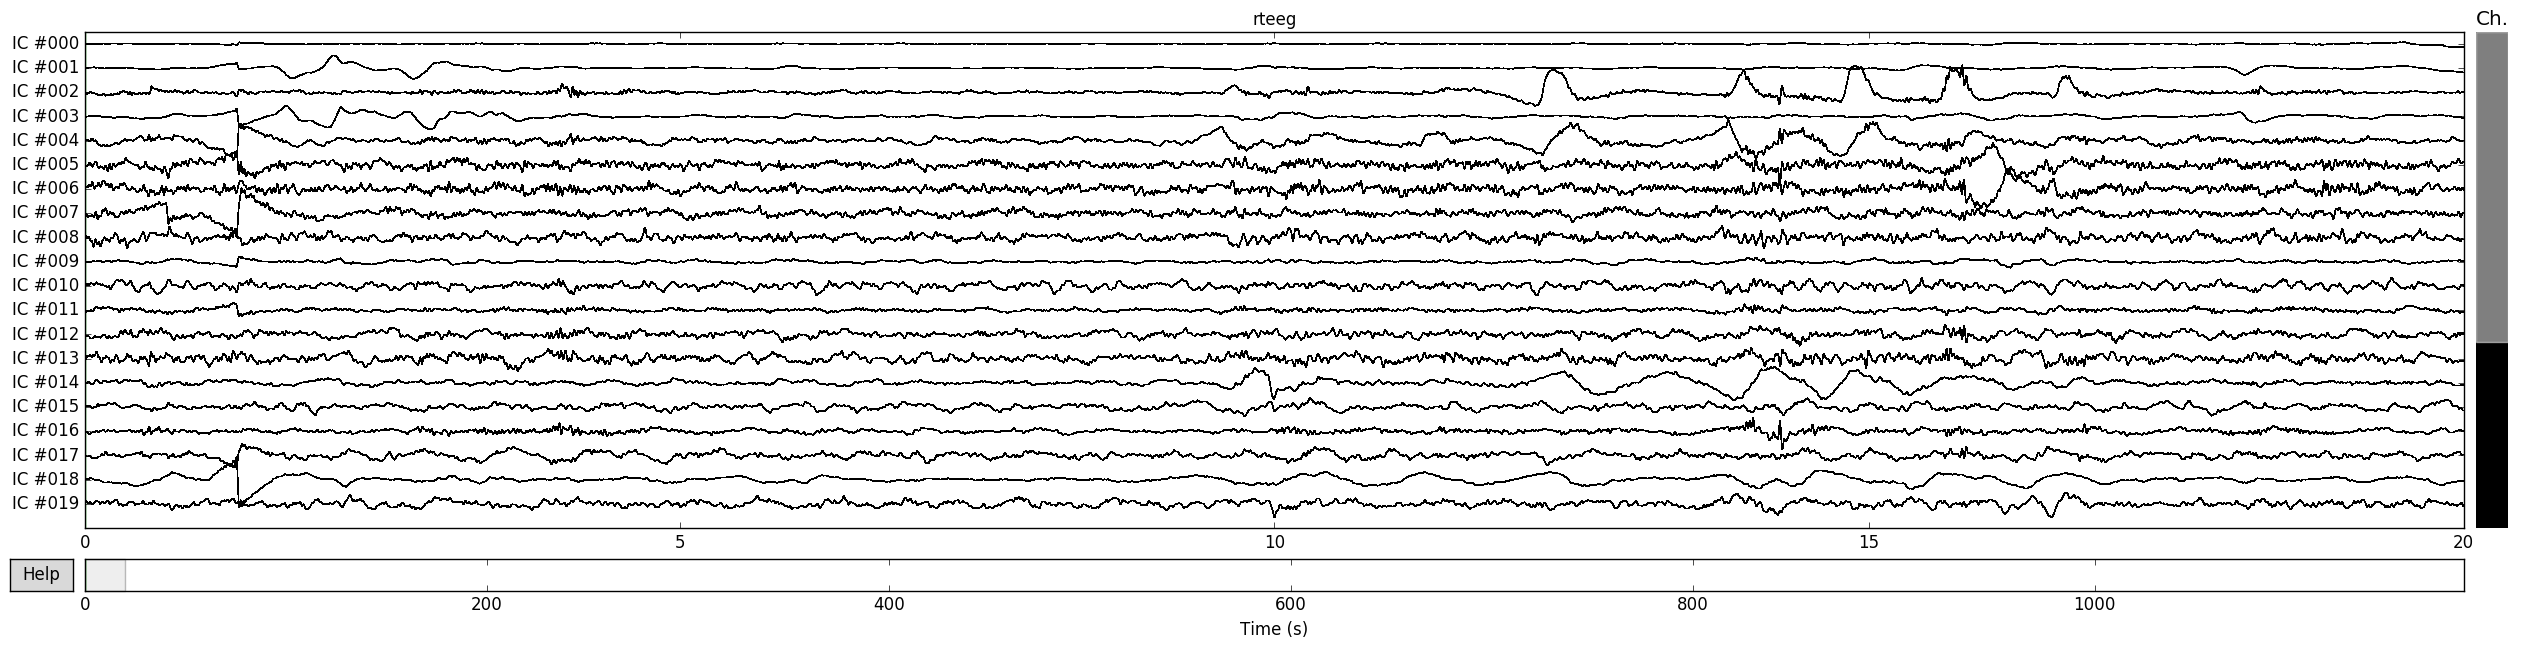

In [28]:
rteeg_ica.plot_sources(raw_rteeg, title='rteeg')

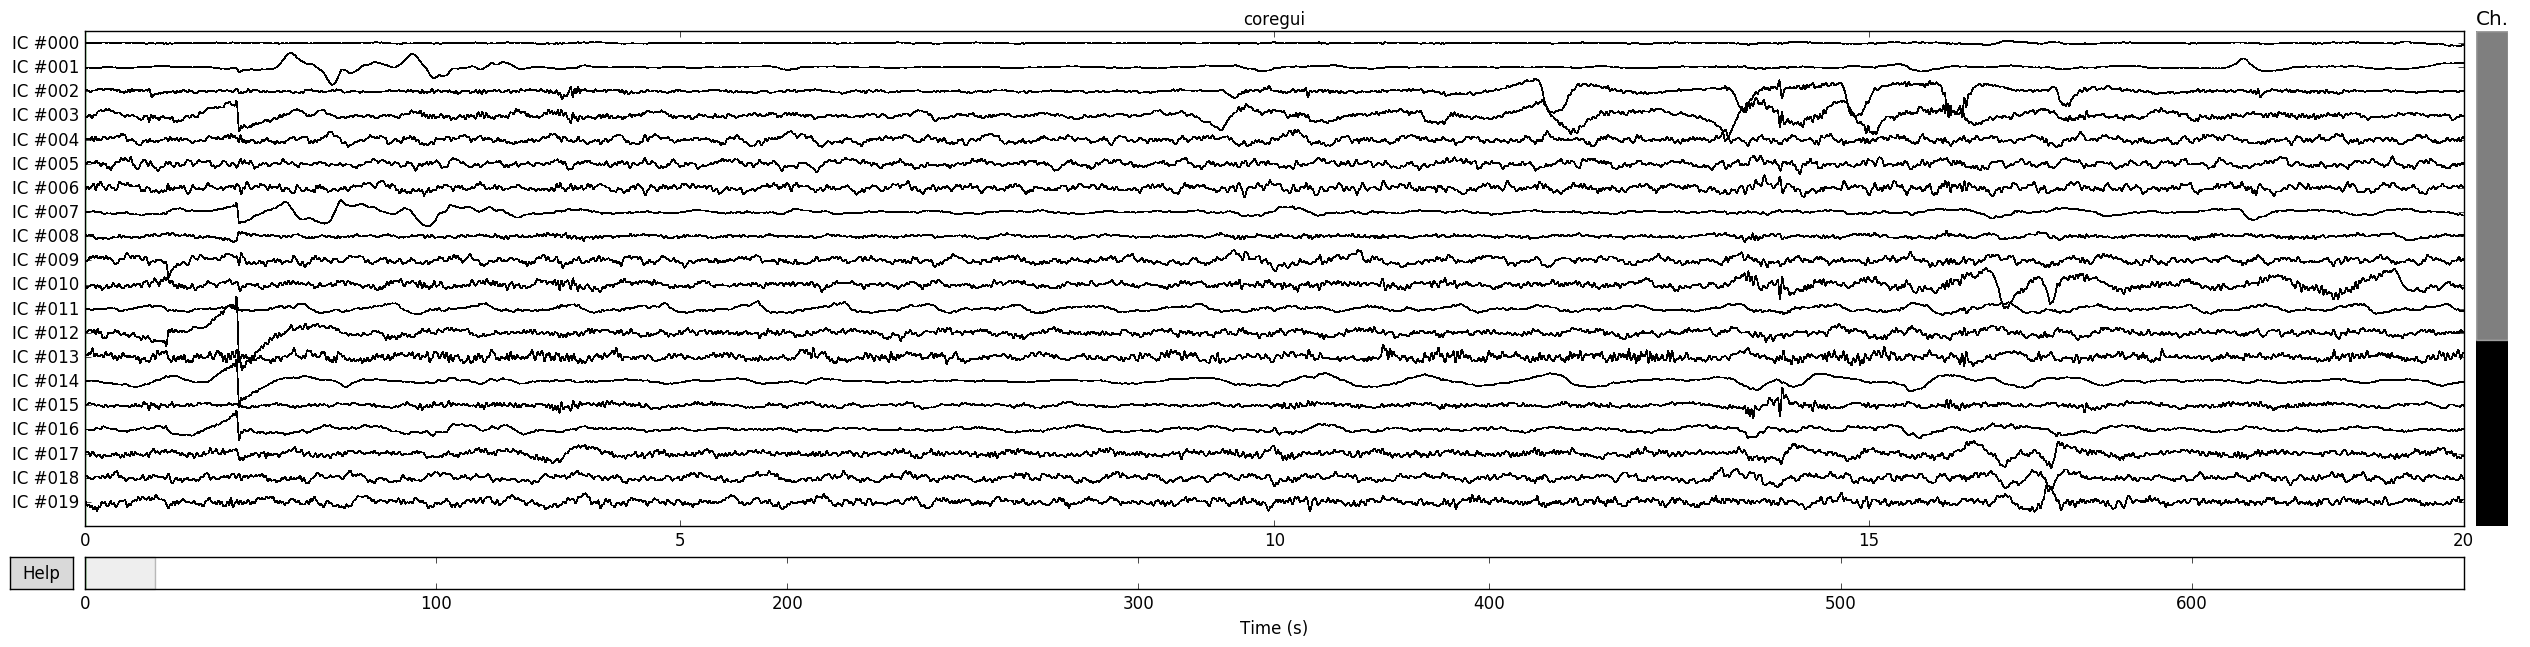

In [29]:
coregui_ica.plot_sources(raw_coregui, title='coregui')

In [27]:
rteeg_ica.plot_components()